Longitud de predicciones Modelo 1: 2438, Longitud de variable objetivo: 2438
Longitud de predicciones Modelo 2: 2438, Longitud de variable objetivo: 2438
Matriz de Confusión - Modelo 1 (Árbol de Decisión):
[[1248    9]
 [   6 1175]]

Matriz de Confusión - Modelo 2 (Random Forest):
[[1257    0]
 [   3 1178]]

Reporte de Clasificación - Modelo 1 (Árbol de Decisión):
              precision    recall  f1-score   support

           e       1.00      0.99      0.99      1257
           p       0.99      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438


Reporte de Clasificación - Modelo 2 (Random Forest):
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00 

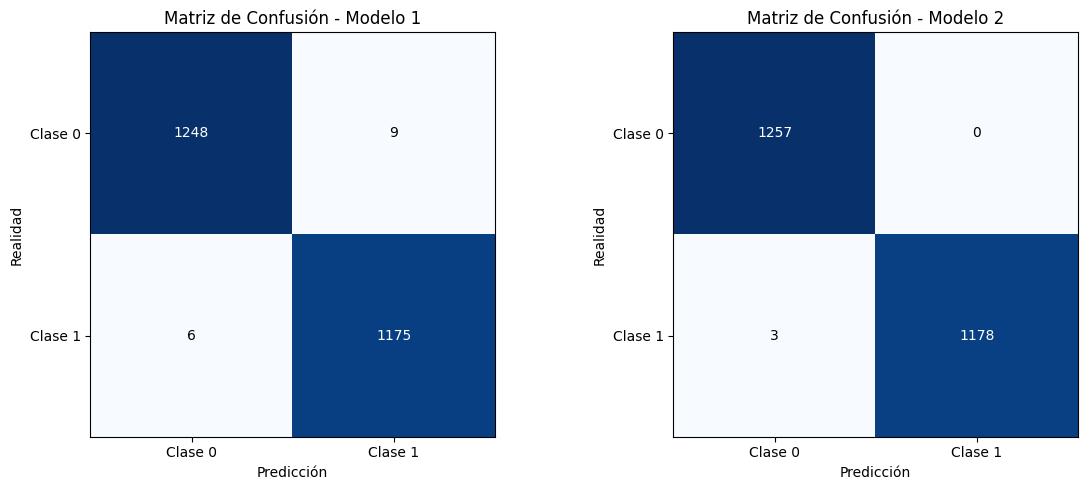

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split

#Cargar predicciones
y_pred_modelo_1 = pd.read_csv('predicciones_modelo_1.csv').squeeze()
y_pred_modelo_2 = pd.read_csv('predicciones_modelo_2.csv').squeeze()

#Cargar el conjunto de prueba
X = pd.read_csv('mushroom_preprocessed.csv')
y = pd.read_csv('mushroom_targets.csv').squeeze()

#Dividir el dataset en prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Verificar la longitud de las predicciones y la variable objetivo
print(f"Longitud de predicciones Modelo 1: {len(y_pred_modelo_1)}, Longitud de variable objetivo: {len(y_test)}")
print(f"Longitud de predicciones Modelo 2: {len(y_pred_modelo_2)}, Longitud de variable objetivo: {len(y_test)}")

#Matriz de confusión
confusion_matrix_modelo_1 = confusion_matrix(y_test, y_pred_modelo_1)
confusion_matrix_modelo_2 = confusion_matrix(y_test, y_pred_modelo_2)

print("Matriz de Confusión - Modelo 1 (Árbol de Decisión):")
print(confusion_matrix_modelo_1)
print("\nMatriz de Confusión - Modelo 2 (Random Forest):")
print(confusion_matrix_modelo_2)

#Reporte de clasificación para ambos modelos
print("\nReporte de Clasificación - Modelo 1 (Árbol de Decisión):")
print(classification_report(y_test, y_pred_modelo_1))
print("\nReporte de Clasificación - Modelo 2 (Random Forest):")
print(classification_report(y_test, y_pred_modelo_2))

#Análisis de Concordancia
def concordance_analysis(cm):
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)  # Tasa de verdaderos positivos
    specificity = TN / (TN + FP)  # Tasa de verdaderos negativos
    return accuracy, sensitivity, specificity

concordance_modelo_1 = concordance_analysis(confusion_matrix_modelo_1)
concordance_modelo_2 = concordance_analysis(confusion_matrix_modelo_2)

print("\nAnálisis de Concordancia - Modelo 1 (Árbol de Decisión):")
print(f"Precisión: {concordance_modelo_1[0]:.2f}, Sensibilidad: {concordance_modelo_1[1]:.2f}, Especificidad: {concordance_modelo_1[2]:.2f}")

print("\nAnálisis de Concordancia - Modelo 2 (Random Forest):")
print(f"Precisión: {concordance_modelo_2[0]:.2f}, Sensibilidad: {concordance_modelo_2[1]:.2f}, Especificidad: {concordance_modelo_2[2]:.2f}")

#Calcular el coeficiente Kappa de Cohen
kappa_score = cohen_kappa_score(y_pred_modelo_1, y_pred_modelo_2)
print(f"\nCoeficiente Kappa de Cohen entre los dos modelos: {kappa_score:.2f}")

#Graficas matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#Modelo 1
ax[0].imshow(confusion_matrix_modelo_1, interpolation='nearest', cmap=plt.cm.Blues)
ax[0].set_title('Matriz de Confusión - Modelo 1')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Realidad')
ax[0].set_xticks(np.arange(2))
ax[0].set_yticks(np.arange(2))
ax[0].set_xticklabels(['Clase 0', 'Clase 1'])
ax[0].set_yticklabels(['Clase 0', 'Clase 1'])
for i in range(2):
    for j in range(2):
        ax[0].text(j, i, confusion_matrix_modelo_1[i, j], ha='center', va='center', color='white' if confusion_matrix_modelo_1[i, j] > confusion_matrix_modelo_1.max()/2 else 'black')

#Modelo 2
ax[1].imshow(confusion_matrix_modelo_2, interpolation='nearest', cmap=plt.cm.Blues)
ax[1].set_title('Matriz de Confusión - Modelo 2')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Realidad')
ax[1].set_xticks(np.arange(2))
ax[1].set_yticks(np.arange(2))
ax[1].set_xticklabels(['Clase 0', 'Clase 1'])
ax[1].set_yticklabels(['Clase 0', 'Clase 1'])
for i in range(2):
    for j in range(2):
        ax[1].text(j, i, confusion_matrix_modelo_2[i, j], ha='center', va='center', color='white' if confusion_matrix_modelo_2[i, j] > confusion_matrix_modelo_2.max()/2 else 'black')

plt.tight_layout()
plt.show()
